### Introduction to deep learning for computer vision



Instantiating a small Convolution network


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [73]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5


ValueError: ignored

#ANSWER 1:

Understanding convolution strides 

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
model.summary()

##Downloading the datasets of Dogs and Cats 

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gloriastephen","key":"ae2ee8190af709e0071a52838dad4a02"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle competitions download -c dogs-vs-cats
     

 99% 803M/812M [00:03<00:00, 263MB/s]
100% 812M/812M [00:03<00:00, 265MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip

In [7]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# **Training the convent network from scratch**


**Instantiating a small convnet for dogs cats classification**

In [9]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=1200)


In [10]:
from tensorflow import keras
from tensorflow.keras import layers


**Instantiating a small convnet for dogs vs. cats classification**

In [11]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [13]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Reading the images from the dataset

In [14]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [15]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [16]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [17]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [18]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Display the data shapes and labels generated by the Dataset**

In [19]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a Dataset**

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 113ms/step - loss: 0.7131 - accuracy: 0.5115 - val_loss: 0.6922 - val_accuracy: 0.4990
Epoch 2/30
63/63 [==============================] - 7s 102ms/step - loss: 0.6937 - accuracy: 0.5270 - val_loss: 0.6874 - val_accuracy: 0.5850
Epoch 3/30
63/63 [==============================] - 5s 65ms/step - loss: 0.6864 - accuracy: 0.5680 - val_loss: 0.6651 - val_accuracy: 0.6190
Epoch 4/30
63/63 [==============================] - 6s 96ms/step - loss: 0.6570 - accuracy: 0.6340 - val_loss: 0.7660 - val_accuracy: 0.5510
Epoch 5/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6373 - accuracy: 0.6395 - val_loss: 0.6596 - val_accuracy: 0.6130
Epoch 6/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6018 - accuracy: 0.6680 - val_loss: 0.6263 - val_accuracy: 0.6440
Epoch 7/30
63/63 [==============================] - 6s 85ms/step - loss: 0.5763 - accuracy: 0.6800 - val_loss: 0.6309 - val_accuracy: 0.6580
Epoch 8/30

**Displaying the curves of Loss and Accuracy during training phase**

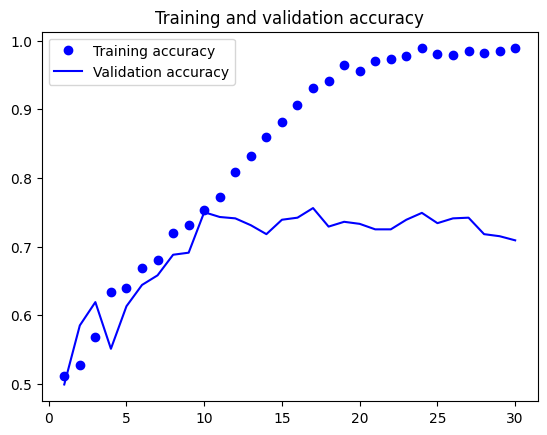

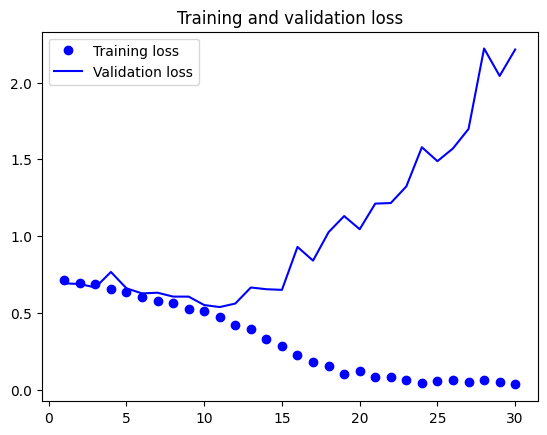

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluation of the model on Test Dataset**

In [22]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 41ms/step - loss: 0.5060 - accuracy: 0.7570
Test accuracy: 0.757


##OUPUT:


##Initially Modeling the data under various 

Reducing Overfitting model :(i) Data Augmentation (improves the model's performance)

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)



In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 67ms/step - loss: 0.6954 - accuracy: 0.4905 - val_loss: 0.6927 - val_accuracy: 0.5070
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6921 - val_accuracy: 0.5060
Epoch 3/30
63/63 [==============================] - 4s 66ms/step - loss: 0.6883 - accuracy: 0.5720 - val_loss: 0.6711 - val_accuracy: 0.6020
Epoch 4/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6770 - accuracy: 0.5905 - val_loss: 0.6648 - val_accuracy: 0.5790
Epoch 5/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6569 - accuracy: 0.6215 - val_loss: 0.6551 - val_accuracy: 0.6000
Epoch 6/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6312 - accuracy: 0.6335 - val_loss: 0.6241 - val_accuracy: 0.6500
Epoch 7/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6149 - accuracy: 0.6580 - val_loss: 0.6310 - val_accuracy: 0.6390
Epoch 8/30
63

In [26]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.3883 - accuracy: 0.8280
Test accuracy: 0.828


Augmentating the data by adding an image 

In [27]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Randomly adding images


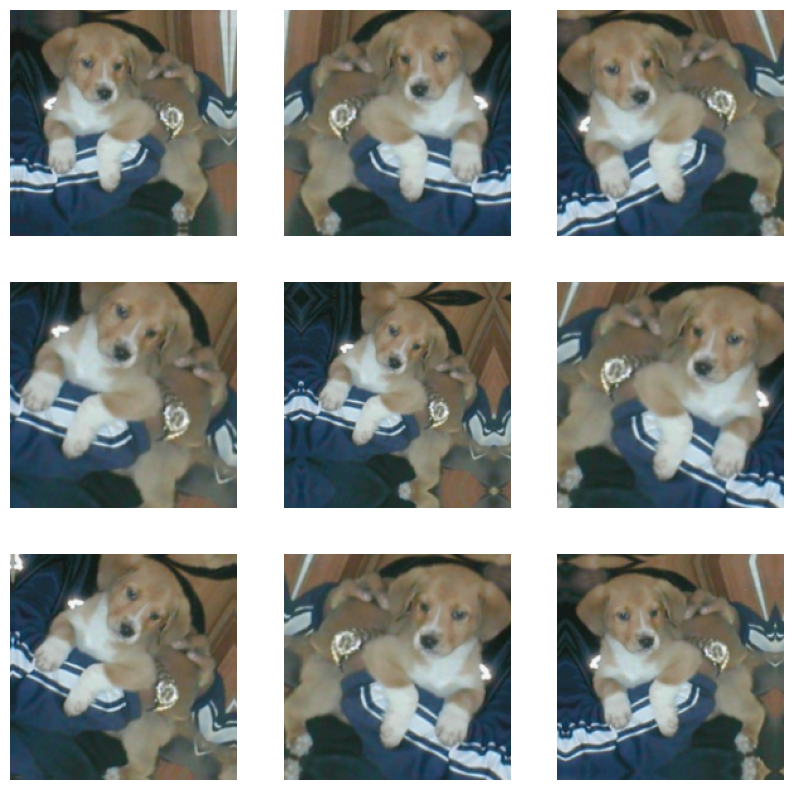

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Reducing Overfitting model: (ii) Dropout Method

In [29]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 88ms/step - loss: 0.7059 - accuracy: 0.4955 - val_loss: 0.6920 - val_accuracy: 0.5440
Epoch 2/30
63/63 [==============================] - 4s 63ms/step - loss: 0.7016 - accuracy: 0.5580 - val_loss: 0.6847 - val_accuracy: 0.5380
Epoch 3/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6821 - accuracy: 0.5820 - val_loss: 0.6628 - val_accuracy: 0.5920
Epoch 4/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6586 - accuracy: 0.6110 - val_loss: 0.6742 - val_accuracy: 0.5540
Epoch 5/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6404 - accuracy: 0.6280 - val_loss: 0.6299 - val_accuracy: 0.6490
Epoch 6/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6226 - accuracy: 0.6595 - val_loss: 0.6769 - val_accuracy: 0.6250
Epoch 7/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5917 - accuracy: 0.6895 - val_loss: 0.5975 - val_accuracy: 0.6750
Epoch 8/30
63

In [31]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.5093 - accuracy: 0.7530
Test accuracy: 0.753


Reducing Overfitting model :(iv) Both Image Augmentation and Dropout

In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)



In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [34]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 75ms/step - loss: 0.7002 - accuracy: 0.5040 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6952 - accuracy: 0.5130 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6874 - accuracy: 0.5520 - val_loss: 0.6665 - val_accuracy: 0.6060
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6702 - accuracy: 0.5990 - val_loss: 0.6465 - val_accuracy: 0.6230
Epoch 5/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6726 - accuracy: 0.6050 - val_loss: 0.6387 - val_accuracy: 0.6060
Epoch 6/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6471 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6740
Epoch 7/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6233 - accuracy: 0.6625 - val_loss: 0.6071 - val_accuracy: 0.6820
Epoch 8/30
63

In [35]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 51ms/step - loss: 0.3920 - accuracy: 0.8250
Test accuracy: 0.825


Post  three strategies outlined we can observe that the model trained with both data augmentation and the drop out method provided substantially increased accuracy, thus we will use this technique. 

##Increase training sample with various size : implementing maxpooling method

In [36]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Defining a new convnet that includes image augmentation and dropout**

In [37]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more. 
early_stopping_monitor = EarlyStopping(patience=10)

In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


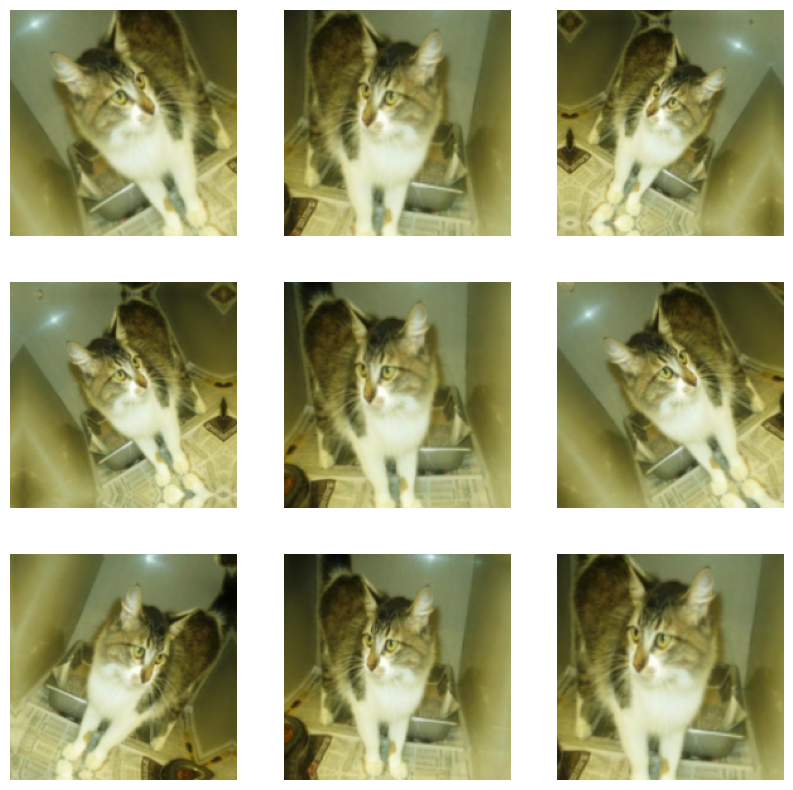

In [40]:
plt.figure(figsize=(15, 15))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 18s 52ms/step - loss: 0.6901 - accuracy: 0.5493 - val_loss: 0.6551 - val_accuracy: 0.6030
Epoch 2/30
313/313 [==============================] - 18s 56ms/step - loss: 0.6230 - accuracy: 0.6594 - val_loss: 0.7077 - val_accuracy: 0.6150
Epoch 3/30
313/313 [==============================] - 17s 52ms/step - loss: 0.5482 - accuracy: 0.7270 - val_loss: 0.5292 - val_accuracy: 0.7450
Epoch 4/30
313/313 [==============================] - 17s 52ms/step - loss: 0.4834 - accuracy: 0.7704 - val_loss: 0.4354 - val_accuracy: 0.7860
Epoch 5/30
313/313 [==============================] - 18s 56ms/step - loss: 0.4238 - accuracy: 0.8094 - val_loss: 0.3431 - val_accuracy: 0.8430
Epoch 6/30
313/313 [==============================] - 20s 62ms/step - loss: 0.3733 - accuracy: 0.8328 - val_loss: 0.2660 - val_accuracy: 0.8930
Epoch 7/30
313/313 [==============================] - 17s 55ms/step - loss: 0.3242 - accuracy: 0.8641 - val_loss: 0.2789 - val_accuracy:

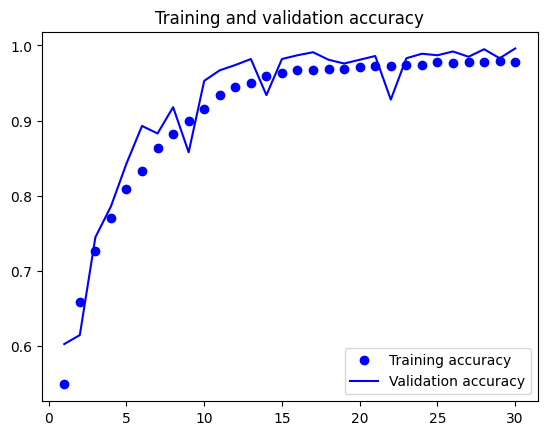

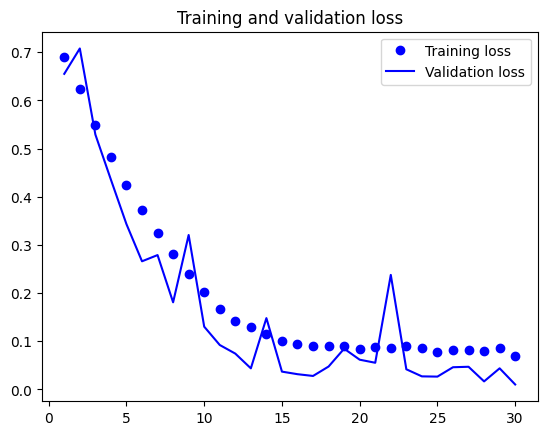

In [42]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [43]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 46ms/step - loss: 0.8441 - accuracy: 0.8620
Test accuracy: 0.862


#2.Training sample increased to 12000**

In [44]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_0", start_index=0, end_index=12000)
make_subset("validation_0", start_index=12000, end_index=13500)
make_subset("test_0", start_index=13500, end_index=14000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_0",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_0",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_0",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [45]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


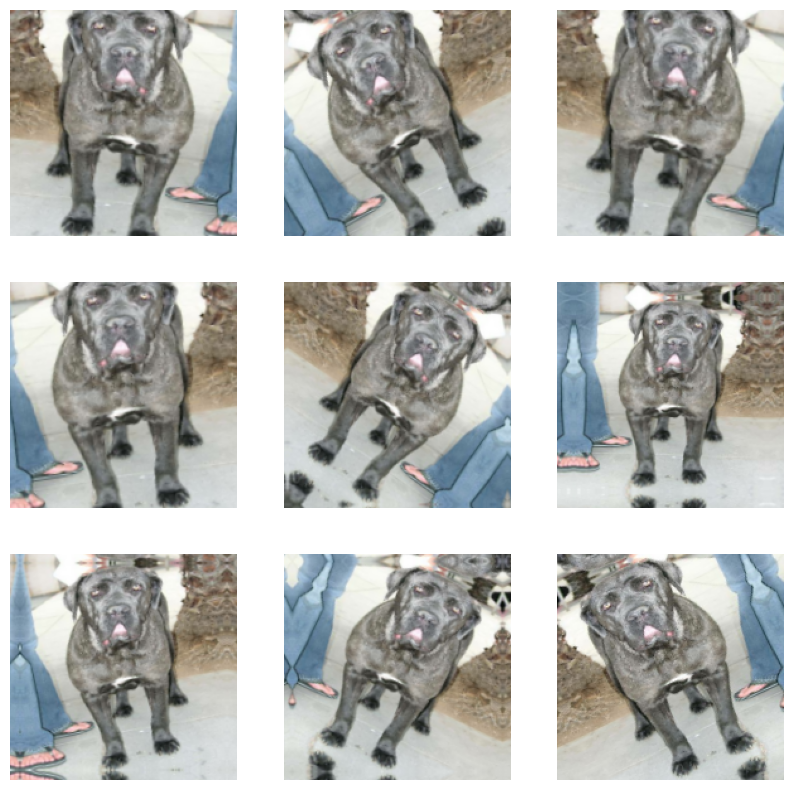

In [47]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_4,
    epochs=40,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 36s 55ms/step - loss: 0.6552 - accuracy: 0.6055 - val_loss: 0.5627 - val_accuracy: 0.7170
Epoch 2/30
625/625 [==============================] - 35s 56ms/step - loss: 0.5049 - accuracy: 0.7552 - val_loss: 0.4709 - val_accuracy: 0.7600
Epoch 3/30
625/625 [==============================] - 38s 61ms/step - loss: 0.4116 - accuracy: 0.8159 - val_loss: 0.3656 - val_accuracy: 0.8360
Epoch 4/30
625/625 [==============================] - 39s 62ms/step - loss: 0.3362 - accuracy: 0.8516 - val_loss: 0.3581 - val_accuracy: 0.8570
Epoch 5/30
625/625 [==============================] - 36s 57ms/step - loss: 0.2798 - accuracy: 0.8841 - val_loss: 0.3049 - val_accuracy: 0.8700
Epoch 6/30
625/625 [==============================] - 35s 56ms/step - loss: 0.2325 - accuracy: 0.9025 - val_loss: 0.4047 - val_accuracy: 0.8530
Epoch 7/30
625/625 [==============================] - 39s 62ms/step - loss: 0.1955 - accuracy: 0.9218 - val_loss: 0.2689 - val_accuracy:

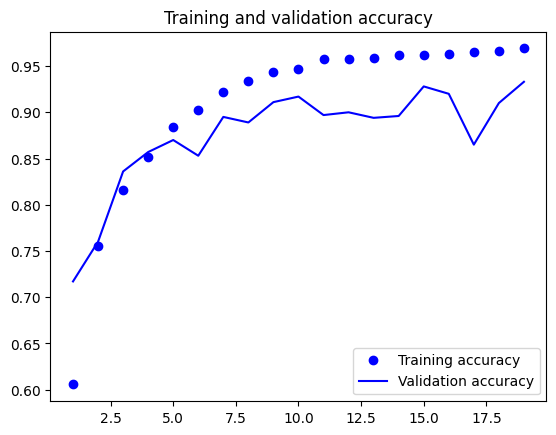

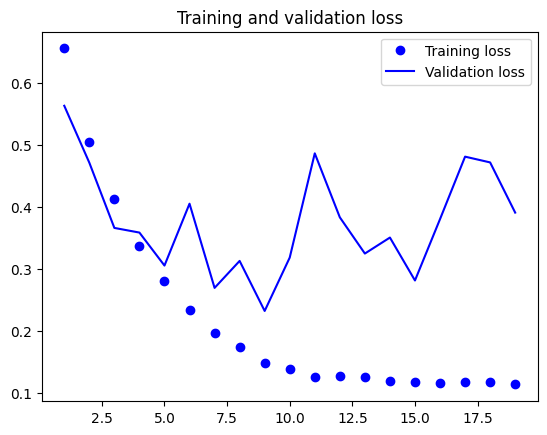

In [49]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [50]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 33ms/step - loss: 0.3487 - accuracy: 0.8820
Test accuracy: 0.882


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

##Answer4: 

 **Pre-Trained Model - 1000 Training samples**

In [51]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [52]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [53]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [54]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Classifying the convolution base to improve the performance

In [55]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [56]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [57]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 222ms/step - loss: 3.8056 - accuracy: 0.7485 - val_loss: 0.9454 - val_accuracy: 0.8970
Epoch 2/30
63/63 [==============================] - 11s 178ms/step - loss: 1.1709 - accuracy: 0.8675 - val_loss: 0.5148 - val_accuracy: 0.9320
Epoch 3/30
63/63 [==============================] - 11s 171ms/step - loss: 0.7245 - accuracy: 0.9035 - val_loss: 0.3329 - val_accuracy: 0.9490
Epoch 4/30
63/63 [==============================] - 11s 169ms/step - loss: 0.3805 - accuracy: 0.9215 - val_loss: 0.3022 - val_accuracy: 0.9560
Epoch 5/30
63/63 [==============================] - 11s 172ms/step - loss: 0.3438 - accuracy: 0.9380 - val_loss: 0.2562 - val_accuracy: 0.9600
Epoch 6/30
63/63 [==============================] - 11s 168ms/step - loss: 0.1844 - accuracy: 0.9510 - val_loss: 0.2479 - val_accuracy: 0.9590
Epoch 7/30
63/63 [==============================] - 11s 167ms/step - loss: 0.1792 - accuracy: 0.9560 - val_loss: 0.2582 - val_accuracy: 0.9620

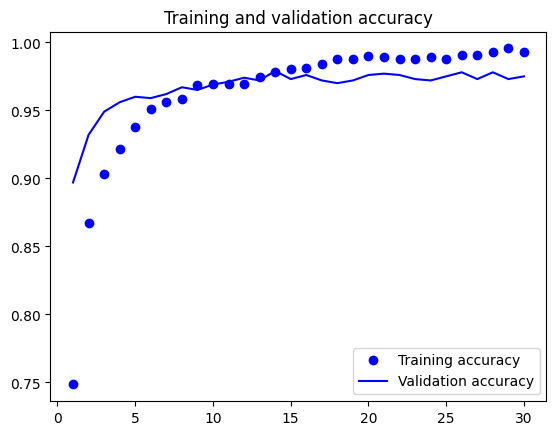

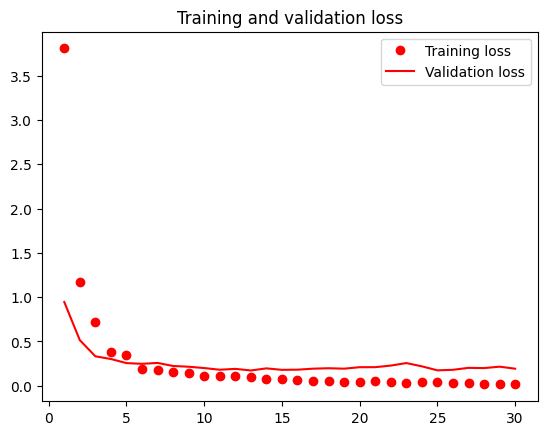

In [58]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [59]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 91ms/step - loss: 0.1121 - accuracy: 0.9790
Test accuracy: 0.979


##Pre-trained dataset: 8000 samples using techniques as Fine Tuning 

In [60]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [61]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [62]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [63]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [64]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 43s 128ms/step - loss: 1.4030 - accuracy: 0.8668 - val_loss: 0.1894 - val_accuracy: 0.9580
Epoch 2/10
313/313 [==============================] - 39s 125ms/step - loss: 0.2379 - accuracy: 0.9355 - val_loss: 0.1013 - val_accuracy: 0.9710
Epoch 3/10
313/313 [==============================] - 42s 132ms/step - loss: 0.1424 - accuracy: 0.9470 - val_loss: 0.0888 - val_accuracy: 0.9780
Epoch 4/10
313/313 [==============================] - 40s 127ms/step - loss: 0.1217 - accuracy: 0.9601 - val_loss: 0.1087 - val_accuracy: 0.9730
Epoch 5/10
313/313 [==============================] - 41s 128ms/step - loss: 0.1129 - accuracy: 0.9640 - val_loss: 0.0942 - val_accuracy: 0.9760
Epoch 6/10
313/313 [==============================] - 40s 125ms/step - loss: 0.0942 - accuracy: 0.9682 - val_loss: 0.1157 - val_accuracy: 0.9720
Epoch 7/10
313/313 [==============================] - 39s 125ms/step - loss: 0.0769 - accuracy: 0.9740 - val_loss: 0.1397 - val_ac

In [65]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 91ms/step - loss: 0.1373 - accuracy: 0.9740
Test accuracy: 0.974


**Pre-Trained Model - 18000 samples**

In [66]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [67]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [68]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [69]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [70]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 78s 121ms/step - loss: 0.8793 - accuracy: 0.8881 - val_loss: 0.1528 - val_accuracy: 0.9610
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.1428 - accuracy: 0.9514 - val_loss: 0.1491 - val_accuracy: 0.9630
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 0.1081 - accuracy: 0.9638 - val_loss: 0.1982 - val_accuracy: 0.9640
Epoch 4/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0946 - accuracy: 0.9671 - val_loss: 0.1817 - val_accuracy: 0.9660
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.0861 - accuracy: 0.9705 - val_loss: 0.1928 - val_accuracy: 0.9680
Epoch 6/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0809 - accuracy: 0.9740 - val_loss: 0.1612 - val_accuracy: 0.9800
Epoch 7/10
625/625 [==============================] - 75s 120ms/step - loss: 0.0782 - accuracy: 0.9726 - val_loss: 0.1769 - val_ac

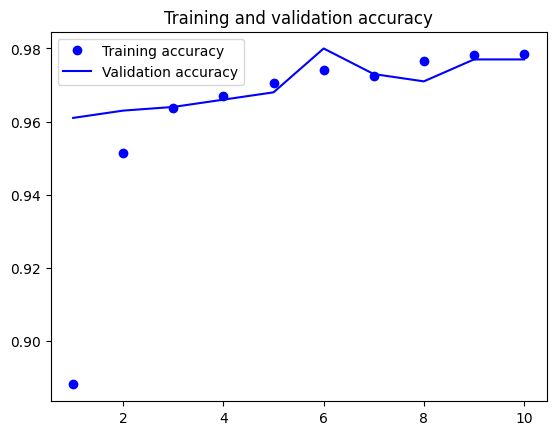

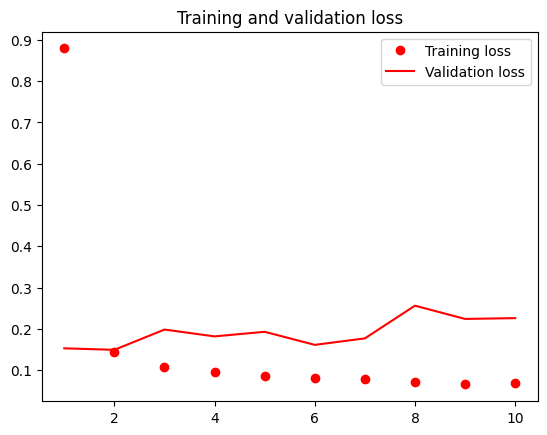

In [71]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "go", label="Training accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [72]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 92ms/step - loss: 0.0659 - accuracy: 0.9850
Test accuracy: 0.985


#CONCLUSION

1.The Model 1 that is the unregularized Model of Cats and Dogs example with training sample of 1000, validation sample of 500 and test sample of 500 gives very low accuracy that is 71%. This represents Overfitting as the training size is small.

2.By using different techniques, we can optimize the performance of the model kepp the sample size the same that is 1000.
For this I have used three techniques on the model those are
a) Drop out Method

b) Data Augmentation

c) Data Augmentation and drop out method.

3.It was observed that the model trained using data augmentation and dropout method gave improved accuracy.





4.Train with more data: As training with more data helps to increase the accuracy. We tried to increase the training samples to 5000 and 10000 gave improved accuracy.

5.Here when the models are pretrained the accuracy was improved upto almost 99%.